# Open and visualise modis l3 data

## imports

In [35]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# for geopandas
import geopandas as gpd

# possible modes: 
modes = [
        { # 0
            "type": "chlor_a", 
            "filename": "../../datasets/modis/AQUA_MODIS.20230101_20230131.L3m.MO.CHL.chlor_a.4km.nc",
            "description":"chlorophyll"
        },
        { # 1
            "type": "sst",
            "filename": "../../datasets/modis/AQUA_MODIS.20230101_20230131.L3m.MO.SST.sst.4km.nc",
            "description":"sea surface temperature"
        }
]

mode = modes[1]

## read data

In [36]:
# read the data
data = nc.Dataset(mode["filename"], "r")

## modify

In [37]:
print("=== GLOBAL ATTRIBUTES ===")
for attr in data.ncattrs():
    print(f"{attr}: {data.getncattr(attr)}")

print("\n=== DIMENSIONS ===")
for dim, dim_info in data.dimensions.items():
    print(f"{dim}: {len(dim_info)}")

print("\n=== VARIABLES ===")
for var, var_info in data.variables.items():
    print(f"{var}: {var_info}")

print("\n=== GROUPS ===")
for group in data.groups:
    print(group)

# read latitude, longitude and poc data
latitude = data.variables['lat'][:]
longitude = data.variables['lon'][:]
poc_data = data.variables[mode["type"]][:]

# replace fill values with NaN for better plotting
fill_value = data.variables[mode["type"]]._FillValue
poc_data = np.where(poc_data == fill_value, np.nan, poc_data)

# # apply the scale_factor and add_offset
# scale_factor = data.variables['chlor_a'].scale_factor
# add_offset = data.variables['chlor_a'].add_offset
# poc_data = poc_data * scale_factor + add_offset

=== GLOBAL ATTRIBUTES ===
product_name: AQUA_MODIS.20230101_20230131.L3m.MO.SST.sst.4km.nc
instrument: MODIS
title: MODISA Level-3 Standard Mapped Image
project: Ocean Biology Processing Group (NASA/GSFC/OBPG)
platform: Aqua
source: satellite observations from MODIS-Aqua
temporal_range: month
processing_version: R2019.0
date_created: 2023-02-20T20:27:04.000Z
history: l3mapgen par=AQUA_MODIS.20230101_20230131.L3m.MO.SST.sst.4km.nc.param 
l2_flag_names: LAND,HISOLZEN
time_coverage_start: 2023-01-01T00:15:00.000Z
time_coverage_end: 2023-02-01T02:24:59.000Z
start_orbit_number: 109901
end_orbit_number: 110353
map_projection: Equidistant Cylindrical
latitude_units: degrees_north
longitude_units: degrees_east
northernmost_latitude: 90.0
southernmost_latitude: -90.0
westernmost_longitude: -180.0
easternmost_longitude: 180.0
geospatial_lat_max: 90.0
geospatial_lat_min: -90.0
geospatial_lon_max: 180.0
geospatial_lon_min: -180.0
latitude_step: 0.0416666679084301
longitude_step: 0.0416666679084301

## crop by coordinates

In [38]:
# read and plot the GeoJSON file
geojson_file = 'map22.geojson'  # replace with your GeoJSON file path
gdf = gpd.read_file(geojson_file)

for polygon in gdf.geometry:
    x,y = polygon.exterior.xy
    plt.plot(x, y, color="red")  # adjust the color as you like

# to zoom into the region covered by the GeoJSON file
x_min, y_min, x_max, y_max = gdf.total_bounds

# set any data below 0 to np.nan
my_poc_data = np.where(poc_data < 0, np.nan, poc_data)

# print the max and min values of my_poc_data
print(np.nanmax(my_poc_data))
print('----')
print(np.nanmin(my_poc_data))

OSError: Error loading libpng16-de2e8f951cb75e05f5d95ceeeda9a11f.dll; Das angegebene Modul wurde nicht gefunden.

# visualisation

## save mapped image (chlor_a)

In [39]:
if mode["type"] == "chlor_a":
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(longitude, latitude, poc_data)
    plt.colorbar(label='Chlorophyll-a (mg m^-3)(?)')
    plt.xlabel('Longitude (degrees east)')
    plt.ylabel('Latitude (degrees north)')
    plt.title('MODISA Level-3 Standard Mapped Image for Chlorophyll-a')
    plt.savefig('tmp/modis_chl.png')
    plt.close()

## save histogram (chlor_a)

In [40]:
if mode["type"] == "chlor_a":
    # plot a histogram of the data excluding values below 1000
    plt.figure(figsize=(12, 6))
    plt.hist(poc_data[~np.isnan(poc_data)], bins=100, range=(0, 87))
    plt.xlabel('Particulate Organic Carbon (mg m^-3)')
    plt.ylabel('Frequency')
    plt.title('Histogram of chlorophyll-a data')
    plt.savefig('tmp/modis_chl_hist.png')
    plt.close()

## saved cropped image (chlor_a)

In [41]:
if mode["type"] == "chlor_a":

    # set min and max value
    min_value = 0
    max_value = 20

    # plot data
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(longitude, latitude, poc_data)
    plt.colorbar(label='Particulate Organic Carbon (mg m^-3)')
    plt.xlabel('Longitude (degrees east)')
    plt.ylabel('Latitude (degrees north)')
    plt.title('MODISA Level-3 Standard Mapped Image for Chlorophyll-a')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.clim(min_value, max_value)
    plt.savefig('tmp/modis_chl_crop.png')
    plt.close()

## save mapped image (sst)

C:\Users\Prinzessin\AppData\Local\Temp\ipykernel_19812\4294439693.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(longitude, latitude, poc_data)


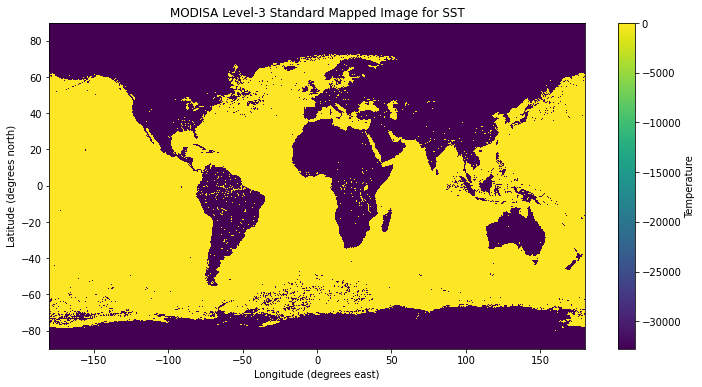

In [42]:
if mode["type"] == "sst":
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(longitude, latitude, poc_data)
    plt.colorbar(label='Temperature')
    plt.xlabel('Longitude (degrees east)')
    plt.ylabel('Latitude (degrees north)')
    plt.title('MODISA Level-3 Standard Mapped Image for SST')
    plt.savefig('tmp/modis_sst.png')
    plt.close()

## save histogram (sst)

In [43]:
if mode["type"] == "sst":
    # todo - does the range make sense??
    # plot a histogram of the data excluding values below 1000
    plt.figure(figsize=(12, 6))
    plt.hist(poc_data[~np.isnan(poc_data)], bins=100, range=(0, 87))
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Histogram of temperature data')
    plt.savefig('tmp/modis_sst_hist.png')
    plt.close()

## save cropped mapped image (sst)

C:\Users\Prinzessin\AppData\Local\Temp\ipykernel_19812\1832939934.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(longitude, latitude, poc_data)


NameError: name 'x_min' is not defined

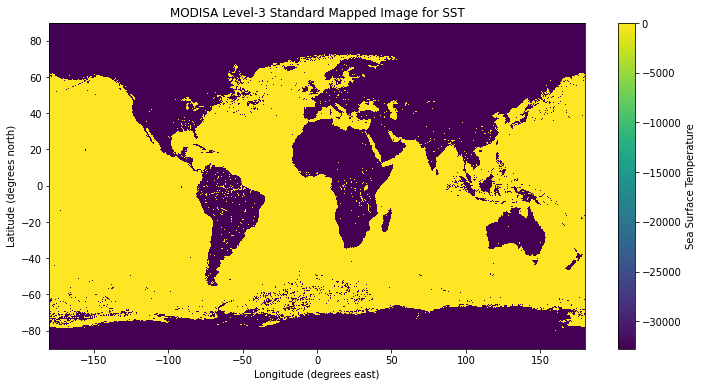

In [44]:
if mode["type"] == "sst":
    # set min and max value
    min_value = 0
    max_value = 20

    # plot data
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(longitude, latitude, poc_data)
    plt.colorbar(label='Sea Surface Temperature')
    plt.xlabel('Longitude (degrees east)')
    plt.ylabel('Latitude (degrees north)')
    plt.title('MODISA Level-3 Standard Mapped Image for SST')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.clim(min_value, max_value)
    plt.savefig('tmp/modis_sst_crop.png')
    plt.close()